In [1]:
# 重回帰分析で株価を予測する

from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ワーニングを非表示にする設定
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# 最大表示行数の指定（ここでは10行を指定）
pd.set_option('display.max_rows', 10)

In [6]:
# pandas_datareaderのDataReaderを使って、2018年始から2021年末までの日経平均株価データをstooqから取得
start = datetime(2018, 1, 1)
end = datetime(2021, 12, 31)
data_master = data.DataReader('^NKX', 'stooq', start, end)

# 日付でソートして古い順に修正
data_master = data_master.sort_index(ascending=True)
data_master


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-04,23073.73,23506.33,23065.20,23506.33,1053914496
2018-01-05,23643.00,23730.47,23520.52,23714.53,1051263424
2018-01-09,23948.97,23952.61,23789.03,23849.99,970172096
2018-01-10,23832.81,23864.76,23755.45,23788.20,914878400
2018-01-11,23656.39,23734.97,23602.92,23710.43,862803200
...,...,...,...,...,...
2021-12-24,28836.05,28870.13,28773.50,28782.59,359085100
2021-12-27,28786.33,28805.03,28661.37,28676.46,374872200
2021-12-28,28953.32,29119.26,28881.44,29069.16,470404100


In [7]:
# 曜日情報を追加（月曜日が0、日曜日が6）
data_master['weekday'] = data_master.index.weekday
data_master

,Open,High,Low,Close,Volume,weekday
Date,,,,,,
2018-01-04,23073.73,23506.33,23065.20,23506.33,1053914496,3
2018-01-05,23643.00,23730.47,23520.52,23714.53,1051263424,4
2018-01-09,23948.97,23952.61,23789.03,23849.99,970172096,1
2018-01-10,23832.81,23864.76,23755.45,23788.20,914878400,2
2018-01-11,23656.39,23734.97,23602.92,23710.43,862803200,3
...,...,...,...,...,...,...
2021-12-24,28836.05,28870.13,28773.50,28782.59,359085100,4
2021-12-27,28786.33,28805.03,28661.37,28676.46,374872200,0
2021-12-28,28953.32,29119.26,28881.44,29069.16,470404100,1


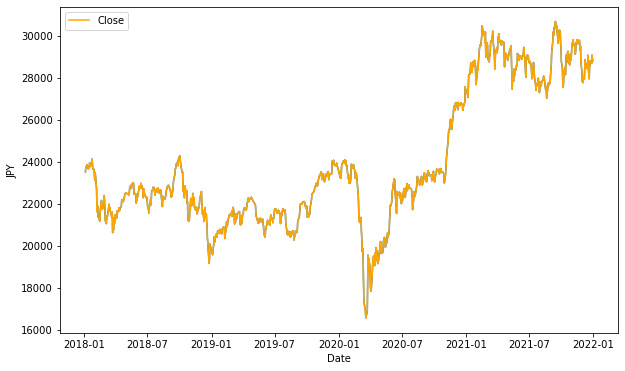

In [8]:
# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(data_master[['Close']])
plt.plot(data_master['Close'], label='Close', color='orange')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

In [9]:
# data_technicalにデータをコピー
data_technical = data_master.copy()

In [10]:
# 移動平均を計算
SMA1 = 5 # 短期移動平均
SMA2 = 10 # 中期移動平均
SMA3 = 15 # 長期移動平均

data_technical['SMA1'] = data_technical['Close'].rolling(SMA1).mean() # 短期移動平均
data_technical['SMA2'] = data_technical['Close'].rolling(SMA2).mean() # 中期移動平均
data_technical['SMA3'] = data_technical['Close'].rolling(SMA3).mean() # 長期移動平均

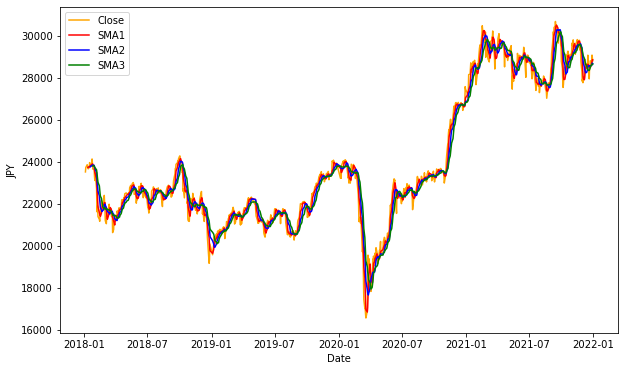

In [11]:
# 特徴量を描画
plt.figure(figsize=(10, 6))

plt.plot(data_technical['Close'], label='Close', color='orange')
plt.plot(data_technical['SMA1'], label='SMA1', color='red')
plt.plot(data_technical['SMA2'], label='SMA2', color='blue')
plt.plot(data_technical['SMA3'], label='SMA3', color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

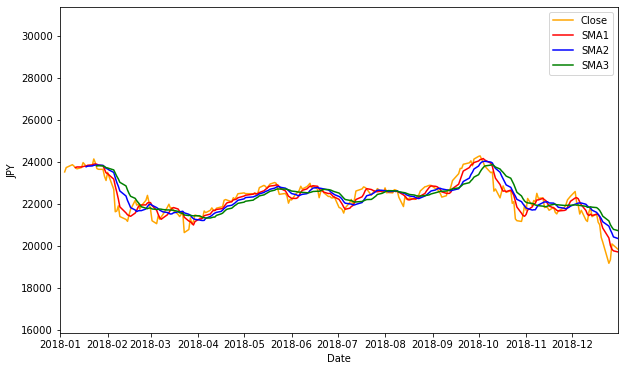

In [12]:
# x軸の拡大
plt.figure(figsize=(10, 6))

plt.plot(data_technical['Close'], label='Close', color='orange')
plt.plot(data_technical['SMA1'], label='SMA1', color='red')
plt.plot(data_technical['SMA2'], label='SMA2', color='blue')
plt.plot(data_technical['SMA3'], label='SMA3', color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
xmin = datetime(2018, 1, 1)
xmax = datetime(2018, 12, 31)
plt.xlim(xmin, xmax)
plt.show()

In [13]:
# OpenとCloseの差分を実体Bodyとする
data_technical['Body'] = data_technical['Open'] - data_technical['Close']

# 前日終値との差分Close_diffを計算
data_technical['Close_diff'] = data_technical['Close'].diff(1)

# 目的変数となる翌日の終値Close_nextを計算
data_technical['Close_next'] = data_technical['Close'].shift(-1)
data_technical

,Open,High,Low,Close,Volume,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,
2018-01-04,23073.73,23506.33,23065.20,23506.33,1053914496,3,NaN,NaN,NaN,-432.60,NaN,23714.53
2018-01-05,23643.00,23730.47,23520.52,23714.53,1051263424,4,NaN,NaN,NaN,-71.53,208.20,23849.99
2018-01-09,23948.97,23952.61,23789.03,23849.99,970172096,1,NaN,NaN,NaN,98.98,135.46,23788.20
2018-01-10,23832.81,23864.76,23755.45,23788.20,914878400,2,NaN,NaN,NaN,44.61,-61.79,23710.43
2018-01-11,23656.39,23734.97,23602.92,23710.43,862803200,3,23713.896,NaN,NaN,-54.04,-77.77,23653.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,28836.05,28870.13,28773.50,28782.59,359085100,4,28519.714,28574.342,28543.350000,53.46,-15.78,28676.46
2021-12-27,28786.33,28805.03,28661.37,28676.46,374872200,0,28667.444,28577.939,28593.289333,109.87,-106.13,29069.16
2021-12-28,28953.32,29119.26,28881.44,29069.16,470404100,1,28777.758,28641.591,28634.193333,-115.84,392.70,28906.88


In [15]:
# 欠損値がある行を削除
data_technical = data_technical.dropna(how='any')
data_technical

,Open,High,Low,Close,Volume,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,
2018-01-25,23750.65,23828.40,23649.03,23669.49,840056832,3,23871.762,23831.103,23792.034000,81.16,-271.29,23631.88
2018-01-26,23757.34,23797.96,23592.28,23631.88,898744896,4,23836.526,23828.909,23800.404000,125.46,-37.61,23629.34
2018-01-29,23707.14,23787.23,23580.17,23629.34,708858688,0,23799.128,23820.355,23794.724667,77.80,-2.54,23291.97
2018-01-30,23557.02,23581.98,23233.37,23291.97,914748288,1,23632.692,23754.371,23757.523333,265.05,-337.37,23098.29
2018-01-31,23205.23,23375.38,23092.85,23098.29,1028900480,2,23464.194,23677.366,23711.529333,106.94,-193.68,23486.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,28693.52,28798.37,28640.15,28798.37,435638200,3,28472.332,28539.860,28493.148667,-104.85,236.16,28782.59
2021-12-24,28836.05,28870.13,28773.50,28782.59,359085100,4,28519.714,28574.342,28543.350000,53.46,-15.78,28676.46
2021-12-27,28786.33,28805.03,28661.37,28676.46,374872200,0,28667.444,28577.939,28593.289333,109.87,-106.13,29069.16


In [16]:
# 木曜日のデータを抽出
data_technical = data_technical[data_technical['weekday'] == 3]
data_technical

,Open,High,Low,Close,Volume,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,
2018-01-25,23750.65,23828.40,23649.03,23669.49,840056832,3,23871.762,23831.103,23792.034000,81.16,-271.29,23631.88
2018-02-01,23276.10,23492.77,23211.12,23486.11,1048996224,3,23427.518,23649.640,23696.574667,-210.01,387.82,23274.53
2018-02-08,21721.57,21977.03,21649.70,21890.86,1079440640,3,22220.616,22824.067,23173.298667,-169.29,245.49,21382.62
2018-02-15,21384.10,21578.99,21309.26,21464.98,891143488,3,21427.462,21983.564,22477.107333,-80.88,310.81,21720.25
2018-02-22,21789.88,21799.40,21626.85,21736.44,796712512,3,21900.362,21663.912,21955.830000,53.44,-234.37,21892.78
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29469.65,29567.81,29444.54,29499.28,507120000,3,29584.116,29608.166,29559.126000,-29.63,196.62,28751.62
2021-12-02,27716.20,27935.73,27644.96,27753.37,774195800,3,28109.258,28846.687,29108.530000,-37.17,-182.25,28029.57
2021-12-09,28827.32,28908.29,28725.47,28725.47,543774000,3,28399.726,28254.492,28697.700000,101.85,-135.15,28437.77


In [17]:
# 必要なカラムのみを抽出
data_technical = data_technical[['High', 'Low', 'Open', 'Close', 'Body', 'Close_diff', 'SMA1', 'SMA2', 'SMA3', 'Close_next']]
data_technical

,High,Low,Open,Close,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2018-01-25,23828.40,23649.03,23750.65,23669.49,81.16,-271.29,23871.762,23831.103,23792.034000,23631.88
2018-02-01,23492.77,23211.12,23276.10,23486.11,-210.01,387.82,23427.518,23649.640,23696.574667,23274.53
2018-02-08,21977.03,21649.70,21721.57,21890.86,-169.29,245.49,22220.616,22824.067,23173.298667,21382.62
2018-02-15,21578.99,21309.26,21384.10,21464.98,-80.88,310.81,21427.462,21983.564,22477.107333,21720.25
2018-02-22,21799.40,21626.85,21789.88,21736.44,53.44,-234.37,21900.362,21663.912,21955.830000,21892.78
...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29567.81,29444.54,29469.65,29499.28,-29.63,196.62,29584.116,29608.166,29559.126000,28751.62
2021-12-02,27935.73,27644.96,27716.20,27753.37,-37.17,-182.25,28109.258,28846.687,29108.530000,28029.57
2021-12-09,28908.29,28725.47,28827.32,28725.47,101.85,-135.15,28399.726,28254.492,28697.700000,28437.77


In [18]:
# 2018年から2020年までのデータを学習用データとする
train = data_technical['2018-01-01':'2020-12-31']
train

,High,Low,Open,Close,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2018-01-25,23828.40,23649.03,23750.65,23669.49,81.16,-271.29,23871.762,23831.103,23792.034000,23631.88
2018-02-01,23492.77,23211.12,23276.10,23486.11,-210.01,387.82,23427.518,23649.640,23696.574667,23274.53
2018-02-08,21977.03,21649.70,21721.57,21890.86,-169.29,245.49,22220.616,22824.067,23173.298667,21382.62
2018-02-15,21578.99,21309.26,21384.10,21464.98,-80.88,310.81,21427.462,21983.564,22477.107333,21720.25
2018-02-22,21799.40,21626.85,21789.88,21736.44,53.44,-234.37,21900.362,21663.912,21955.830000,21892.78
...,...,...,...,...,...,...,...,...,...,...
2020-11-26,26557.74,26255.47,26255.47,26537.31,-281.84,240.45,26032.294,25871.791,25482.896667,26644.71
2020-12-03,26864.84,26721.18,26740.30,26809.37,-69.07,8.39,26695.244,26363.769,26146.275333,26751.24
2020-12-10,26852.35,26639.98,26688.50,26756.24,-67.74,-61.70,26667.988,26681.616,26465.175333,26652.52


In [19]:
# 2021年のデータをテスト用データとする
test = data_technical['2021-01-01':]
test

,High,Low,Open,Close,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2021-01-07,27624.73,27340.46,27340.46,27490.13,-149.67,434.19,27281.450,27067.918,26943.830000,28139.03
2021-01-14,28978.58,28411.58,28442.73,28698.26,-255.53,241.67,28189.670,27743.362,27371.586000,28519.18
2021-01-21,28844.60,28677.61,28710.41,28756.86,-46.45,233.60,28534.994,28362.332,28007.239333,28631.45
2021-01-28,28360.31,27981.05,28169.27,28197.42,-28.15,-437.79,28566.510,28550.752,28430.391333,27663.39
2021-02-04,28597.53,28326.29,28557.46,28341.95,215.51,-304.55,28221.012,28393.761,28440.838667,28779.19
...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29567.81,29444.54,29469.65,29499.28,-29.63,196.62,29584.116,29608.166,29559.126000,28751.62
2021-12-02,27935.73,27644.96,27716.20,27753.37,-37.17,-182.25,28109.258,28846.687,29108.530000,28029.57
2021-12-09,28908.29,28725.47,28827.32,28725.47,101.85,-135.15,28399.726,28254.492,28697.700000,28437.77


In [20]:
# 学習用データとテスト用データの説明変数と目的変数を分ける
X_train = train.drop(columns=['Close_next']) # 学習用データの説明変数
y_train = train['Close_next'] # 学習用データの目的変数

X_test = test.drop(columns=['Close_next']) # テスト用データの説明変数
y_test = test['Close_next'] # テスト用データの目的変数

In [21]:
# 線形回帰モデルのLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
# 時系列分割のためのTimeSeriesSplitをインポート
from sklearn.model_selection import TimeSeriesSplit
# 予測精度検証のためのmean_squared_errorをインポート
from sklearn.metrics import mean_squared_error as mse

In [22]:
# 時系列分割交差検証のインスタンスを生成
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)
for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train)):
    X_train_cv, X_valid_cv = X_train.iloc[train_indices], X_train.iloc[valid_indices]
    y_train_cv, y_valid_cv = y_train.iloc[train_indices], y_train.iloc[valid_indices]

    # 線形回帰モデルのインスタンスを生成
    model = LinearRegression()

    # モデル学習
    model.fit(X_train_cv, y_train_cv)

    # 予測
    y_valid_pred = model.predict(X_valid_cv)

    # 予測精度（RMSE）を計算
    score = np.sqrt(mse(y_valid_cv, y_valid_pred))

    # 予測精度を格納
    valid_scores.append(score)

In [23]:
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'cv_score: {cv_score}')

valid_scores: [323.5063023310761, 168.188041407168, 405.6460512339377, 194.48831833215675]
cv_score: 272.95717832608466


In [24]:
# 2021年金曜日の株価を前日木曜のデータから予測
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = np.sqrt(mse(y_test, y_pred))
print(f'RMSE: {score}')

RMSE: 438.7002724228262


In [27]:
# 実際のデータと予測データをデータフレームに格納
df_result = test[['Close_next']].copy()  # .copy()を追加
df_result['Close_pred'] = y_pred
df_result

,Close_next,Close_pred
Date,,
2021-01-07,28139.03,27296.971957
2021-01-14,28519.18,28609.956195
2021-01-21,28631.45,28618.514411
2021-01-28,27663.39,28034.831784
2021-02-04,28779.19,28324.615637
...,...,...
2021-11-25,28751.62,29244.319883
2021-12-02,28029.57,27462.238260
2021-12-09,28437.77,28771.952495


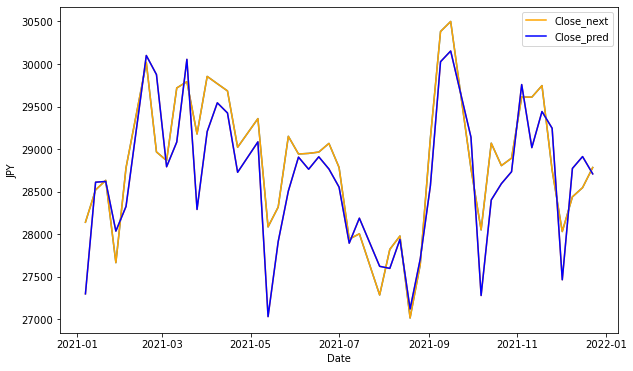

In [33]:
# 実際のデータと予測データの比較グラフを描画
plt.figure(figsize=(10, 6))
plt.plot(df_result[['Close_next', 'Close_pred']])
plt.plot(df_result['Close_next'], label='Close_next', color='orange')
plt.plot(df_result['Close_pred'], label='Close_pred', color='blue')
plt.xlabel('Date')
plt.ylabel('JPY')
xmin = df_result.index.min()
xmax = df_result.index.max()
plt.legend()
plt.show()

In [34]:
# 誤差を計算
df_result['diff'] = df_result['Close_pred'] - df_result['Close_next']

<function matplotlib.pyplot.show(close=None, block=None)>

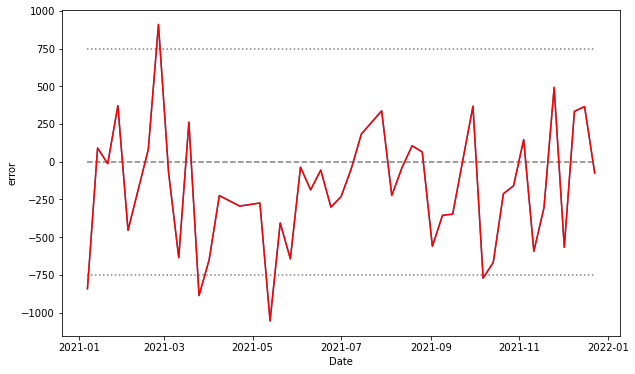

In [35]:
# 誤差のグラフを描画
plt.figure(figsize=(10, 6))
plt.plot(df_result[['diff']])
plt.plot(df_result['diff'], label='diff', color='red')
plt.xlabel('Date')
plt.ylabel('error')
plt.hlines(0, xmin, xmax, color='gray', linestyles='dashed')
plt.hlines(750, xmin, xmax, color='gray', linestyles=':')
plt.hlines(-750, xmin, xmax, color='gray', linestyles=':')
plt.legend
plt.show


In [36]:
# 予測モデルの係数を確認
coef = pd.DataFrame(model.coef_) # 係数をデータフレームに格納
coef.index = X_train.columns # カラム名を説明変数に設定
coef

,0
High,-2.773566e-01
Low,-6.271609e-02
Open,-1.062442e+11
Close,1.062442e+11
Body,1.062442e+11
Close_diff,-3.005599e-01
SMA1,-2.881637e-01
SMA2,-1.405645e-01
SMA3,4.762457e-02


In [37]:
# 予測モデルの切片を確認
model.intercept_

449.1274829931972

In [38]:
# X_train基本統計量の確認
X_train.describe()

,High,Low,Open,Close,Body,Close_diff,SMA1,SMA2,SMA3
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,22299.081224,22074.188503,22205.387891,22181.435374,23.952517,-23.145986,22180.526218,22170.984109,22161.327937
std,1554.116739,1600.173246,1554.143459,1589.970869,156.947938,264.522578,1545.593828,1498.570430,1449.221162
min,17158.530000,16358.200000,16995.770000,16552.830000,-371.430000,-915.180000,16944.800000,17647.499000,17983.368667
25%,21489.775000,21287.960000,21408.805000,21354.905000,-68.065000,-167.620000,21282.618000,21402.355500,21357.445000
50%,22299.390000,22072.250000,22195.190000,22192.040000,20.010000,-2.060000,22181.570000,22090.515000,22136.175333
75%,23209.345000,22966.280000,23147.060000,23063.200000,103.265000,123.180000,23153.982000,23130.475000,23144.893333
max,26864.840000,26721.180000,26744.500000,26809.370000,570.170000,750.560000,26727.374000,26697.681000,26696.868667
